We have carried out a thorough analysis to comprehend if the new digital design leads better user experience and higher process completion rates.
The datasets incudes variables like client age, client tenure month, number of accounts, balance for both users who uses traditional process and who uses the digital interface. The primary objective is to decode the experiment’s performance.
our analysis includes-
-- An overview of the demographics or client behaviour analysis or who are the primary customers.

-- A comparative analysis of the key performance indicators (KPIs) , which in our case are 1. Completion Rate(Percentage of users who have reached the confirm stage.) 2. Time Spent on Each Step (The average duration users spend on each step) 3. Error Rates (If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error)

-- Based on the KPIs, we have conducted hypothesis testing to make data-driven conclusions about the effectiveness of the redesign.
-- Experiment Evaluation
1. The  experiment was well-structured, as we see significant change in response rates.
2. The users were randomly and equally divided between the old and new designs
3. There could be biases, as we feel the information we received is not sufficient enough. The should be more details/insights on the steps,/ every page, to figure out what could be the probable reasons of the results we got.



## Importing and merging all the data.

In [137]:
# importing all necessary libraries

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [138]:
# Merging all datasets to a final one and cleaning all the null values which could create a problem later on.
        
# Reading variation table and web_data table
df1 = pd.read_csv("df_final_experiment_clients.csv")
df2 = pd.read_csv('merged_df_final_web_data.csv')
df3 = pd.read_csv("df_final_demo.csv")

#Merging to merged_df_final
merged_df1 = pd.merge(df1, df2, on='client_id', how='inner')

# Merging customer_info with merged_df_final
merged_df2 = pd.merge(merged_df1, df3, on='client_id', how='inner')
merged_df2=merged_df2.dropna()
merged_df2.to_csv('merged_df2.csv', index=False)


In [139]:
merged_df2

,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0


## Key demographics and behaviors of Vanguard’s online clients.

After carefully analysing all the variables, we have consisdered, Tenure year, client age, gender as the most significant ones which might have a direct impact on the success rate(process_step) and how  they are related. To serve the purpose we did a bi-variate analysis.


## 1. Correlation between tenure year with other factors

In [140]:
# Creating a dataframe for the numerical variables for further analysing correlation with Tenure year.
numeric_df = merged_df2.select_dtypes(include=[np.number])

In [141]:
# We have used spearman correlation and the result gives a vivid idea how Tenure year is deeply connected with client's  age, balance and number of accounts. here we are ignoring clnt_tenure_mnth, as it dose not make any sense of. 
spearman_correlations= numeric_df.corrwith(merged_df2['clnt_tenure_yr'], method= 'spearman')
spearman_correlation_sorted= spearman_correlations.sort_values(ascending= False)
spearman_correlations_sorted_top = spearman_correlation_sorted[abs(spearman_correlation_sorted) > 0.1]
spearman_correlations_sorted_top

clnt_tenure_yr      1.000000
clnt_tenure_mnth    0.998160
clnt_age            0.298954
bal                 0.276068
num_accts           0.132096
dtype: float64

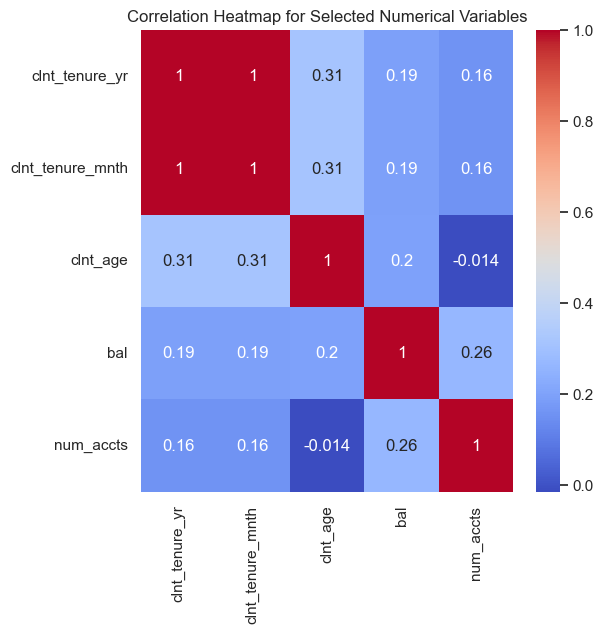

In [142]:
# A heatmap is used to depict the same.
correlation_matrix = numeric_df[spearman_correlations_sorted_top.index].corr()
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

### 2 Relation between tenure year and gender

In [143]:
# Created a crosstab between gender and clinet tenure, and result has been shown using stacked bar.
crosstab_result = pd.crosstab(merged_df2['clnt_tenure_yr'], merged_df2['gendr'])
crosstab_result

gendr,F,M,U,X
clnt_tenure_yr,,,,
2.0,29,53,328,0
3.0,336,265,1613,0
4.0,2064,1819,17032,0
5.0,3891,3710,23738,0
6.0,2423,2344,27062,0
7.0,943,1363,20436,0
8.0,4330,4524,9218,0
9.0,6905,7244,823,3
10.0,6145,6315,537,0


<Axes: xlabel='clnt_tenure_yr'>

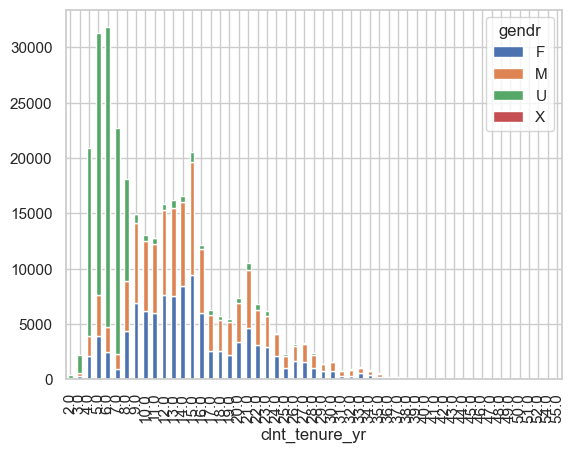

In [144]:
crosstab_result.plot(kind="bar", stacked=True)

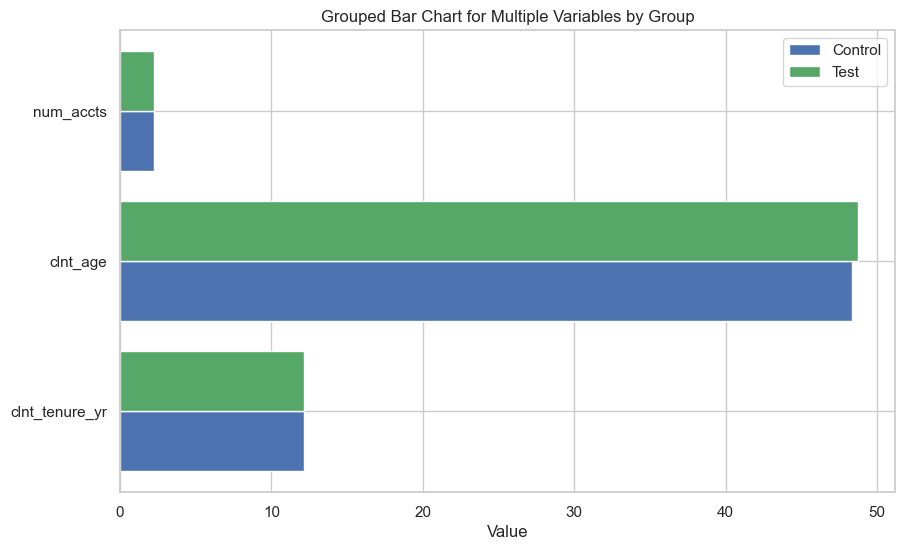

In [145]:
variables = ['clnt_tenure_yr', 'clnt_age', 'num_accts']
control_group = merged_df2[merged_df2['Variation'] == 'Control'][variables].mean()
test_group = merged_df2[merged_df2['Variation'] == 'Test'][variables].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the position of bars
y = np.arange(len(variables))

# Define bar width
bar_width = 0.4

# Plot bars
ax.barh(y - bar_width/2, control_group, bar_width, color='b', label='Control')
ax.barh(y + bar_width/2, test_group, bar_width, color='g', label='Test')

# Set labels
ax.set_yticks(y)
ax.set_yticklabels(variables)
ax.set_xlabel('Value')
ax.set_title('Grouped Bar Chart for Multiple Variables by Group')

# Add a legend
ax.legend()

# Show the plot
plt.show()

## An overview of the three datasets used: Client Profiles, Digital Footprints, and Experiment Roster.
We have carried out univariate analysis here for both control and test group.


In [146]:
# Convert 'date_time' to datetime
merged_df2['date_time'] = pd.to_datetime(merged_df2['date_time'])

# Sort the DataFrame by 'client_id', 'visit_id', and 'date_time'
merged_df2 = merged_df2.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate the duration for each step for each 'client_id' and 'visit_id'
merged_df2['duration'] = merged_df2.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()
merged_df2

,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,duration
94261,555,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,NaN
94260,555,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,7.0
94259,555,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,32.0
94258,555,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,99.0
94257,555,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140280,9999729,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,21.0
140275,9999729,Test,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,NaN
140274,9999729,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,15.0
14818,9999832,Test,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,NaN


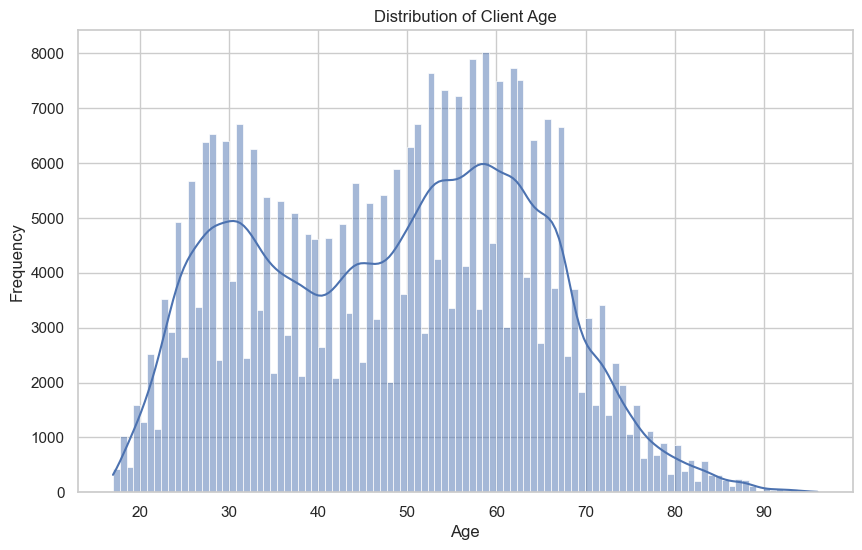

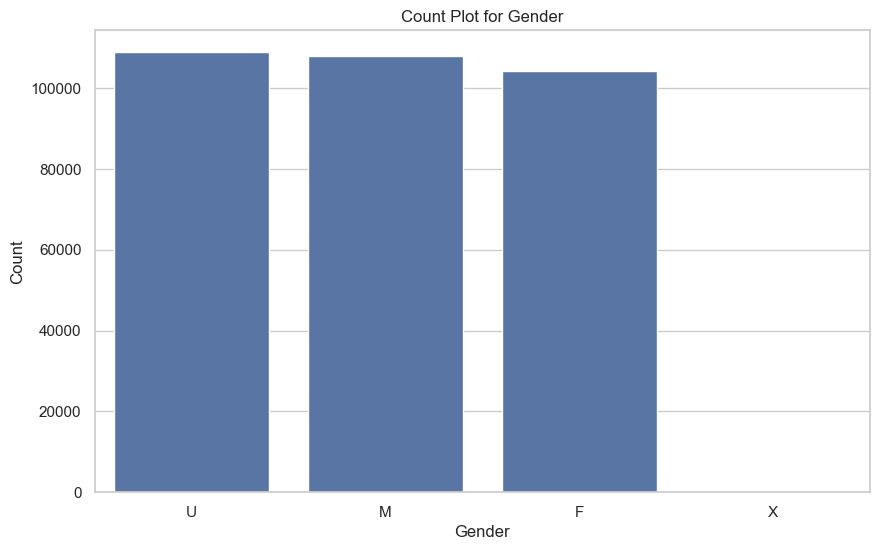

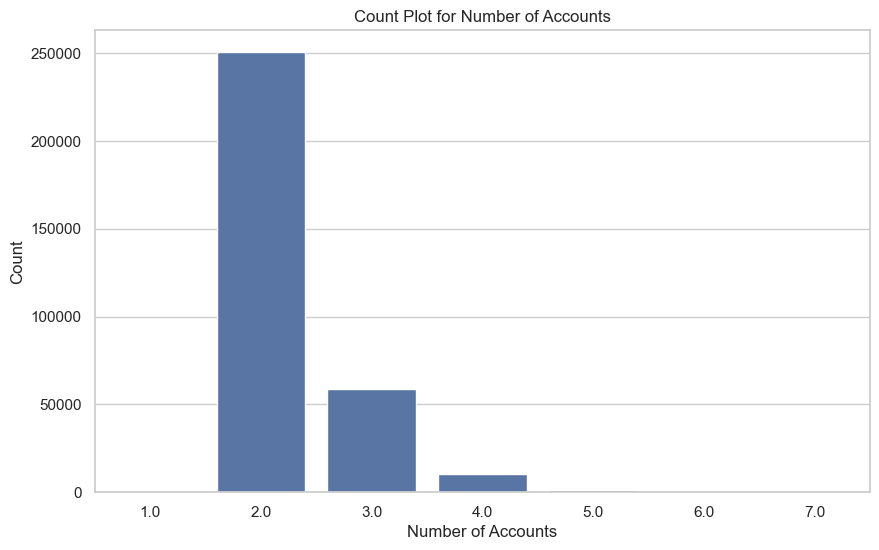

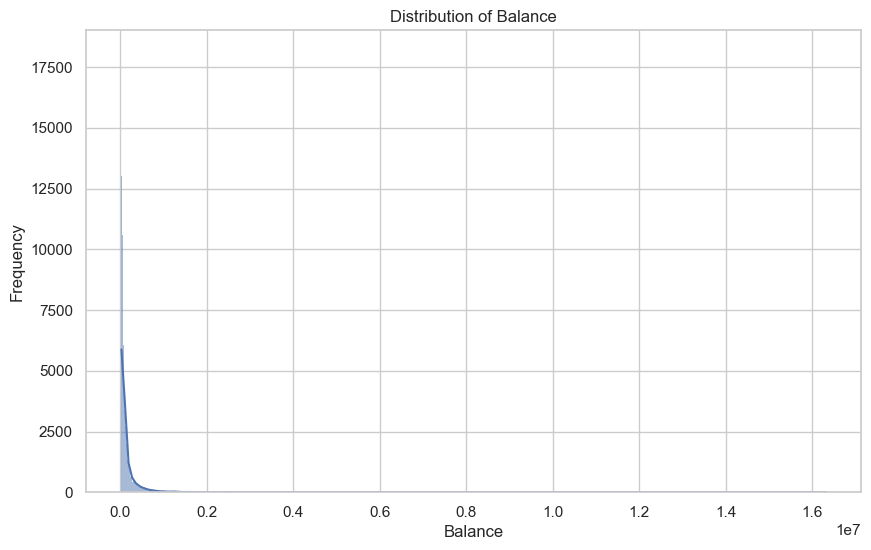

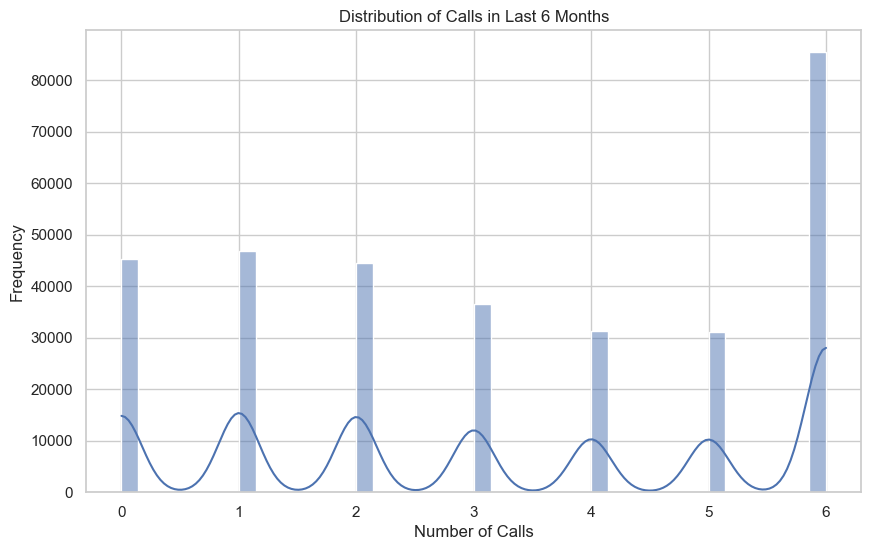

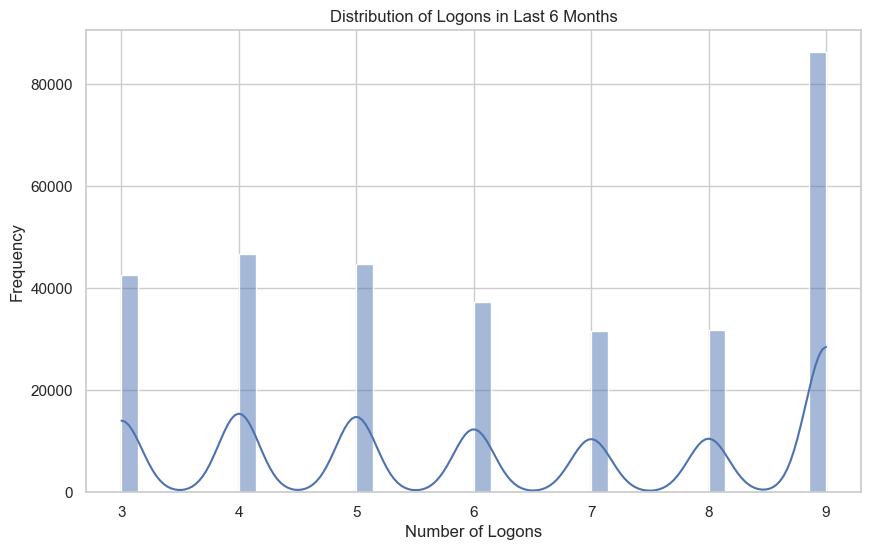

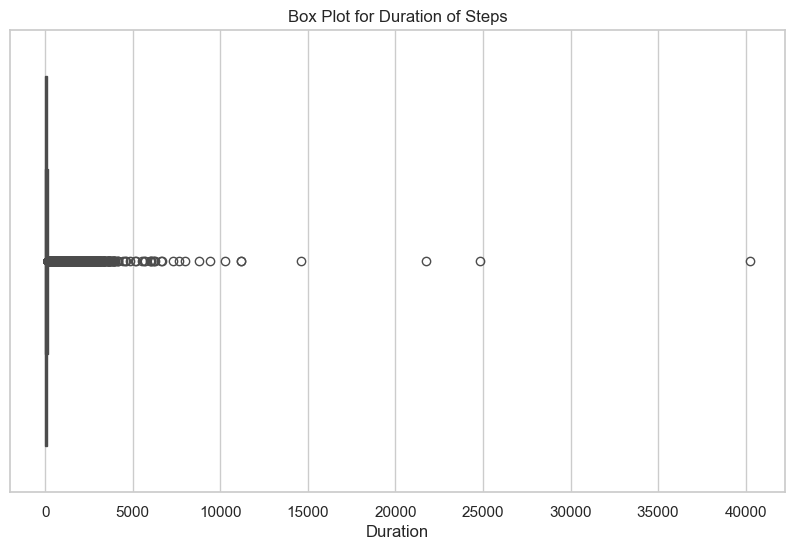

In [147]:
def visualize_data(merged_df2):
    merged_df2['date_time'] = pd.to_datetime(merged_df2['date_time'])

    # Sort the DataFrame by 'client_id', 'visit_id', and 'date_time'
    merged_df2 = merged_df2.sort_values(by=['client_id', 'visit_id', 'date_time'])

    # Calculate the duration for each step for each 'client_id' and 'visit_id'
    merged_df2['duration'] = merged_df2.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

    # Set the style

    # Set the style
    sns.set(style="whitegrid")

    # Plot for Client Age
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_df2, x='clnt_age', kde=True)
    plt.title('Distribution of Client Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    # Plot for Gender
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_df2, x='gendr', order=merged_df2['gendr'].value_counts().index)
    plt.title('Count Plot for Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    # Plot for Number of Accounts
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_df2, x='num_accts')
    plt.title('Count Plot for Number of Accounts')
    plt.xlabel('Number of Accounts')
    plt.ylabel('Count')
    plt.show()

    # Plot for Balance
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_df2, x='bal', kde=True)
    plt.title('Distribution of Balance')
    plt.xlabel('Balance')
    plt.ylabel('Frequency')
    plt.show()

    # Plot for Calls in Last 6 Months
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_df2, x='calls_6_mnth', kde=True)
    plt.title('Distribution of Calls in Last 6 Months')
    plt.xlabel('Number of Calls')
    plt.ylabel('Frequency')
    plt.show()

    # Plot for Logons in Last 6 Months
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_df2, x='logons_6_mnth', kde=True)
    plt.title('Distribution of Logons in Last 6 Months')
    plt.xlabel('Number of Logons')
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot for Duration of Steps
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_df2, x='duration')
    plt.title('Box Plot for Duration of Steps')
    plt.xlabel('Duration')
    plt.show()


visualize_data(merged_df2)

### Insights From the aboove graphs--

## KPIs

### 1. Calculation of success percentage.

In [148]:
num_successes = (test_df['completed_numeric'] == 1).sum()

# Calculate the total number of outcomes
total_outcomes = test_df['completed_numeric'].count()

# Calculate the success ratio
success_ratio = num_successes / total_outcomes if total_outcomes > 0 else 0  # Avoid division by zero
success_ratio_inpercent1 = round(success_ratio*100 ,2)
success_ratio_inpercent1

num_successes = (control_df['completed_numeric'] == 1).sum()

# Calculate the total number of outcomes
total_outcomes = control_df['completed_numeric'].count()

# Calculate the success ratio
success_ratio = num_successes / total_outcomes if total_outcomes > 0 else 0  # Avoid division by zero
success_ratio_inpercent2 = round(success_ratio*100 ,2)
success_ratio_inpercent2

print(f"Success percentage of control group is: {success_ratio_inpercent2:.2f}%, Success percentage of test group is: {success_ratio_inpercent1:.2f}%")

Success percentage of control group is: 58.02%, Success percentage of test group is: 61.38%


### 2. Time Spent on Each Step: The average duration users spend on each step.

### Calculation of average time for both control and Test group

In [182]:
merged_df2_test = merged_df2[merged_df2['Variation'] == 'Test']
# Convert 'date_time' to datetime
merged_df2_test['date_time'] = pd.to_datetime(merged_df2_test['date_time'])

# Sort the DataFrame by 'client_id', 'visit_id', and 'date_time'
merged_df2_test = merged_df2_test.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate the duration for each step for each 'client_id' and 'visit_id'
merged_df2_test['duration'] = merged_df2_test.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()
average_durations_test = merged_df2_test.groupby('process_step')['duration'].mean().reset_index()
average_durations_test.to_csv('average_durations_test.csv', index=False)

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_42471/3814418497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2_test['date_time'] = pd.to_datetime(merged_df2_test['date_time'])


In [183]:
merged_df2_control = merged_df2[merged_df2['Variation'] == 'Control']
merged_df2_control['date_time'] = pd.to_datetime(merged_df2_control['date_time'])
merged_df2_control = merged_df2_control.sort_values(by=['client_id', 'visit_id', 'date_time'])
merged_df2_control['duration'] = merged_df2_control.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()
average_durations_control = merged_df2_control.groupby('process_step')['duration'].mean().reset_index()
average_durations_control.to_csv('average_durations_control.csv', index=False)

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_42471/4236934663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2_control['date_time'] = pd.to_datetime(merged_df2_control['date_time'])


Insight- Start has the max duration follwed by, confirm and step 3.

### 3. Error rate


If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [151]:
df_test_error = merged_df2[merged_df2['Variation'] == 'Test']

df_test_error['date_time'] = pd.to_datetime(df_test_error['date_time'])

# Sort the DataFrame by 'client_id', 'visit_id', and 'date_time'
df_test_error = df_test_error.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Define the order of steps
step_order = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
df_test_error['step_order'] = df_test_error['process_step'].map(step_order)

# Calculate if there is a step reversal
df_test_error['step_reversal'] = df_test_error.groupby(['client_id', 'visit_id'])['step_order'].diff() < 0

# Calculate the total number of steps and the number of reversals
total_steps = df_test_error.groupby(['client_id', 'visit_id']).size()
total_reversals = df_test_error.groupby(['client_id', 'visit_id'])['step_reversal'].sum()

# Calculate the error rate as the proportion of step reversals
error_rate = (total_reversals / total_steps).mean()
error_rate

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_42471/2169823670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_error['date_time'] = pd.to_datetime(df_test_error['date_time'])


0.05915673941257826

In [152]:
df_control_error = merged_df2[merged_df2['Variation'] == 'Control']

df_control_error['date_time'] = pd.to_datetime(df_control_error['date_time'])

# Sort the DataFrame by 'client_id', 'visit_id', and 'date_time'
df_control_error = df_control_error.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Define the order of steps
step_order = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
df_control_error['step_order'] = df_control_error['process_step'].map(step_order)

# Calculate if there is a step reversal
df_control_error['step_reversal'] = df_control_error.groupby(['client_id', 'visit_id'])['step_order'].diff() < 0

# Calculate the total number of steps and the number of reversals
total_steps = df_control_error.groupby(['client_id', 'visit_id']).size()
total_reversals = df_control_error.groupby(['client_id', 'visit_id'])['step_reversal'].sum()

# Calculate the error rate as the proportion of step reversals
error_rate = (total_reversals / total_steps).mean()
error_rate

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_42471/1769816907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control_error['date_time'] = pd.to_datetime(df_control_error['date_time'])


0.039865265344102105

Insights from the above, errror rate is more in the control group than test group.

# To carry out our further analysis, we have conducted hypothesis testing to make data-driven conclusions about the effectiveness of the redesign. 
For which, we have created two dataframes for control and test group seperately. 

In [153]:
# Creating control dataframes and adding column 'completed' for those who have confirmed and converting it to binary outputs for analysis, column named as completed_binary.
df_control = merged_df2[merged_df2['Variation'] == 'Control']
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Sort the DataFrame by client_id, visitor_id, and date_time
df_control = df_control.sort_values(by=['client_id', 'visitor_id', 'date_time'])

# Initialize lists to store new dataframe data
new_data = []

# Dictionary to store start times, end times, and last step
client_data = {}

# Iterate over rows to collect start and confirm times, last step, and calculate other needed data
for index, row in df_control.iterrows():
    client_id = row['client_id']
    visitor_id = row['visitor_id']
    
    if (client_id, visitor_id) not in client_data:
        client_data[(client_id, visitor_id)] = {
            'start_time': None,
            'confirm_time': None,
            'last_step': None,
            'steps': [],
            'age': row['clnt_age'],
            'clnt_tenure': f"{int(row['clnt_tenure_yr'])} years "
        }
    
    step = row['process_step']
    timestamp = row['date_time']
    
    if step == 'start':
        client_data[(client_id, visitor_id)]['start_time'] = timestamp
    elif step == 'confirm':
        client_data[(client_id, visitor_id)]['confirm_time'] = timestamp
    else:
        client_data[(client_id, visitor_id)]['steps'].append((step, timestamp))
    
    if step != 'start':
        client_data[(client_id, visitor_id)]['last_step'] = step

# Process the collected data
for (client_id, visitor_id), data in client_data.items():
    start_time = data['start_time']
    confirm_time = data['confirm_time']
    last_step = data['last_step']
    steps = data['steps']
    
    if start_time is not None and confirm_time is not None:
        completed = 'yes'
        duration = round((confirm_time - start_time).total_seconds() / 60.0, 2)
        last_step = 'confirm'
    else:
        completed = 'no'
        if steps:
            duration = round((steps[-1][1] - start_time).total_seconds() / 60.0, 2) if start_time else None
        else:
            duration = None
    
    new_data.append([client_id, visitor_id, completed, duration, data['age'], data['clnt_tenure'], last_step])

# Create new DataFrame
control_df = pd.DataFrame(new_data, columns=['client_id', 'visitor_id', 'completed', 'duration', 'age', 'clnt_tenure', 'last_step'])

# Add the extra column for completed
control_df['completed_numeric'] = control_df['completed'].map({'yes': 1, 'no': 0})

# Display the resulting DataFrame
control_df

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_42471/1830642742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['date_time'] = pd.to_datetime(df_control['date_time'])


,client_id,visitor_id,completed,duration,age,clnt_tenure,last_step,completed_numeric
0,1028,42237450_62128060588,no,8.97,36.0,12 years,step_1,0
1,1104,194240915_18158000533,no,NaN,48.0,5 years,None,0
2,1186,446844663_31615102958,no,0.37,22.0,8 years,step_2,0
3,1195,766842522_69992551638,yes,4.08,54.5,21 years,confirm,1
4,1197,753759429_54481946928,yes,1.58,28.5,7 years,confirm,1
...,...,...,...,...,...,...,...,...
26346,9997391,494669706_3354361161,no,3.72,60.0,4 years,step_3,0
26347,9997470,395791369_55562604618,yes,1.03,36.0,6 years,confirm,1
26348,9997470,91394485_75296404278,no,NaN,36.0,6 years,None,0
26349,9998346,292425655_16607136645,yes,12.47,61.5,50 years,confirm,1


In [154]:
# Creating test dataframes and adding column 'completed' for those who have confirmed and converting it to binary outputs for analysis, column named as completed_binary.
df_test = merged_df2[merged_df2['Variation'] == 'Test']

df_test['date_time'] = pd.to_datetime(df_test['date_time'])

# Sort the DataFrame by client_id, visitor_id, and date_time
df_test = df_test.sort_values(by=['client_id', 'visitor_id', 'date_time'])

# Initialize lists to store new dataframe data
new_data = []

# Dictionary to store start times, end times, and last step
client_data = {}

# Iterate over rows to collect start and confirm times, last step, and calculate other needed data
for index, row in df_test.iterrows():
    client_id = row['client_id']
    visitor_id = row['visitor_id']
    
    if (client_id, visitor_id) not in client_data:
        client_data[(client_id, visitor_id)] = {
            'start_time': None,
            'confirm_time': None,
            'last_step': None,
            'steps': [],
            'age': row['clnt_age'],
            'clnt_tenure': f"{int(row['clnt_tenure_yr'])} years "
        }
    
    step = row['process_step']
    timestamp = row['date_time']
    
    if step == 'start':
        client_data[(client_id, visitor_id)]['start_time'] = timestamp
    elif step == 'confirm':
        client_data[(client_id, visitor_id)]['confirm_time'] = timestamp
    else:
        client_data[(client_id, visitor_id)]['steps'].append((step, timestamp))
    
    if step != 'start':
        client_data[(client_id, visitor_id)]['last_step'] = step

# Process the collected data
for (client_id, visitor_id), data in client_data.items():
    start_time = data['start_time']
    confirm_time = data['confirm_time']
    last_step = data['last_step']
    steps = data['steps']
    
    if start_time is not None and confirm_time is not None:
        completed = 'yes'
        duration = round((confirm_time - start_time).total_seconds() / 60.0, 2)
        last_step = 'confirm'
    else:
        completed = 'no'
        if steps:
            duration = round((steps[-1][1] - start_time).total_seconds() / 60.0, 2) if start_time else None
        else:
            duration = None
    
    new_data.append([client_id, visitor_id, completed, duration, data['age'], data['clnt_tenure'], last_step])

# Create new DataFrame
test_df = pd.DataFrame(new_data, columns=['client_id', 'visitor_id', 'completed', 'duration', 'age', 'clnt_tenure', 'last_step'])
# Add the extra column for completed
test_df['completed_numeric'] = test_df['completed'].map({'yes': 1, 'no': 0})

test_df

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_42471/3432137567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['date_time'] = pd.to_datetime(df_test['date_time'])


,client_id,visitor_id,completed,duration,age,clnt_tenure,last_step,completed_numeric
0,555,402506806_56087378777,yes,2.63,29.5,3 years,confirm,1
1,647,66758770_53988066587,yes,6.28,57.5,12 years,confirm,1
2,934,810392784_45004760546,no,NaN,51.0,9 years,None,0
3,1336,920624746_32603333901,yes,137.80,42.0,48 years,confirm,1
4,1346,123474046_4204671056,no,0.05,46.0,14 years,step_3,0
...,...,...,...,...,...,...,...,...
30000,9999626,52633065_71189986073,no,0.13,35.0,9 years,step_1,0
30001,9999729,604429154_69247391147,no,0.25,31.0,10 years,step_1,0
30002,9999729,834634258_21862004160,yes,1.25,31.0,10 years,confirm,1
30003,9999729,843385170_36953471821,no,-1.35,31.0,10 years,step_2,0


###  Hypothesis -1 
###  H0 = Control group success rate = Test group success rate 

###  H1= Control group success rate != Test group success rate

alpha= 0.05

we have assumed  control group success rate is same as that of test group. An error rate we have consisdered here is 5 %. After calculating p value, which is  <.05, now we can reject the null hypothesis and further moved to test if it's greater or lower. 

In [155]:
control_numeric_df = control_df['completed_numeric']
control_numeric_df = pd.DataFrame(control_numeric_df)
control_numeric_df.shape

test_numeric_df = test_df['completed_numeric']
test_numeric_df = pd.DataFrame(test_numeric_df)
test_numeric_df.shape


t_stat, p_val = ttest_ind(control_numeric_df['completed_numeric'], test_numeric_df['completed_numeric'], equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")



T-Statistic: -8.130156856984316
P-Value: 4.3755383431637894e-16


### H0 = Control group success rate > Test group success rate 

### H1= Control group success rate < Test group success rate

In [156]:
t_stat, p_val = stats.ttest_ind(test_numeric_df, control_numeric_df, alternative='greater')

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: [8.1373242]
P-Value: [2.06140469e-16]


Interpretation of the Results
T-Statistic: Indicates how many standard deviations the test group mean is from the control group mean.
P-Value: The probability of observing the data if the null hypothesis is true. A lower p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis.
If the p-value is less than or equal to your significance level (e.g., 0.05), you reject the null hypothesis and conclude that the mean success rate of the test group is significantly greater than that of the control group. If the p-value is greater than the significance level, you fail to reject the null hypothesis and conclude that there is not enough evidence to say the mean success rate of the test group is greater than that of the control group.

###  Hypothesis -2
### H0 = Success rate is more when for age group< 47

### H1 = Success rate is more when for age group> 47

We have calculated the mean, seperately for control and test group , cleaned the outliers and carried out hypothesis testing for both groups.

In [157]:
Q1  = test_df['age'].quantile(.25)
Q3  = test_df['age'].quantile(.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = test_df[(test_df['age'] >= lower_bound) & (test_df['age'] <= upper_bound)]
df_filtered

df_filtered['age'].mean().round(2)

47.65

In [158]:
group_1 = df_filtered[df_filtered['age'] <= 47]['completed_numeric']  # Aged 47 or younger
group_2 = df_filtered[df_filtered['age'] > 47]['completed_numeric']    # Aged over 47

# Step 2: Calculate success rates
success_1 = group_1.sum()  # Successes in group 1
total_1 = group_1.count()   # Total in group 1

success_2 = group_2.sum()  # Successes in group 2
total_2 = group_2.count()   # Total in group 2

# Step 3: Perform a two-sample proportion test
successes = [success_1, success_2]
totals = [total_1, total_2]
z_stat, p_value = proportions_ztest(successes, totals)
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence that age > 47 has a higher success rate.")
else:
    print("Fail to reject the null hypothesis: No evidence that age > 47 has a higher success rate.")

# Output results
print(f"Z-statistic: {z_stat}, P-value: {p_value}")
print(f"Success rate for age <= 47: {success_1 / total_1:.2%} (n={total_1})")
print(f"Success rate for age > 47: {success_2 / total_2:.2%} (n={total_2})")

Reject the null hypothesis: There is evidence that age > 47 has a higher success rate.
Z-statistic: 12.8342985792573, P-value: 1.0535279360743302e-37
Success rate for age <= 47: 65.16% (n=14314)
Success rate for age > 47: 57.94% (n=15691)


In [159]:
Q1  = control_df['age'].quantile(.25)
Q3  = control_df['age'].quantile(.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered_control = control_df[(control_df['age'] >= lower_bound) & (control_df['age'] <= upper_bound)]
df_filtered_control
df_filtered_control['age'].mean()

47.80672460248188

In [160]:
group_1 = df_filtered_control[df_filtered_control['age'] <= 47]['completed_numeric']  # Aged 47 or younger
group_2 = df_filtered_control[df_filtered_control['age'] > 47]['completed_numeric']    # Aged over 47

# Step 2: Calculate success rates
success_1 = group_1.sum()  # Successes in group 1
total_1 = group_1.count()   # Total in group 1

success_2 = group_2.sum()  # Successes in group 2
total_2 = group_2.count()   # Total in group 2

# Step 3: Perform a two-sample proportion test
successes = [success_1, success_2]
totals = [total_1, total_2]
z_stat, p_value = proportions_ztest(successes, totals)
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence that age > 47 has a higher success rate.")
else:
    print("Fail to reject the null hypothesis: No evidence that age > 47 has a higher success rate.")

# Output results
print(f"Z-statistic: {z_stat}, P-value: {p_value}")
print(f"Success rate for age <= 47: {success_1 / total_1:.2%} (n={total_1})")
print(f"Success rate for age > 47: {success_2 / total_2:.2%} (n={total_2})")

Reject the null hypothesis: There is evidence that age > 47 has a higher success rate.
Z-statistic: 6.863014301546612, P-value: 6.7422473613817095e-12
Success rate for age <= 47: 60.21% (n=12492)
Success rate for age > 47: 56.04% (n=13859)


### Hypothesis -3 
### The average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process

In [161]:
# Separate control and test groups
control_group = merged_df2[merged_df2['Variation'] == 'Control']['clnt_tenure_yr']
test_group = merged_df2[merged_df2['Variation'] == 'Test']['clnt_tenure_yr']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(control_group, test_group, equal_var=False)  # Assuming unequal variances

# Display the result
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the average client tenure of the control and test groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the average client tenure of the control and test groups.")

t-statistic: -0.3197, p-value: 0.7492
Fail to reject the null hypothesis. There is no significant difference between the average client tenure of the control and test groups.


In [168]:
def data_load(df1, df2, df3 ):
   
    # Reading variation table and web_data table
    df1 = pd.read_csv("df_final_experiment_clients.csv")
    df2 = pd.read_csv('merged_df_final_web_data.csv')
    df3 = pd.read_csv("df_final_demo.csv")

    #Merging to merged_df_final
    merged_df1 = pd.merge(df1, df2, on='client_id', how='inner')

    # Merging customer_info with merged_df_final
    merged_df2 = pd.merge(merged_df1, df3, on='client_id', how='inner')
    merged_df2=merged_df2.dropna()
    return merged_df2


merged_df2 = data_load(df1, df2, df3 )
merged_df2

,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
